<a href="https://colab.research.google.com/github/Nikesh222005/Machine_learning/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation Of ANN using Keras

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import keras


In [ ]:
print("version of tensorflow",tf.__version__)
print("version of keras",keras.__version__)

version of tensorflow 2.19.0
version of keras 3.10.0


Create a simple classifier using keras on MNIST data

In [ ]:
mnist =tf.keras.datasets.mnist
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f"data type of x_train is {type(x_train_full)} ,\n shape of x_train_full:{x_train_full.shape}")


data type of x_train is <class 'numpy.ndarray'> ,
 shape of x_train_full:(60000, 28, 28)


In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train_full[ 0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
len(x_test[1][0])

28

In [ ]:
# create a validation data set from the full training data set
# scale the data between 0 to 1 by dividing it by 255 as its can unsigned data between 0.255 range
x_valid,x_train = x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
print(x_valid)


# scale the test set as well
x_test= x_test / 255.

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
len(x_train_full[5000:])

55000

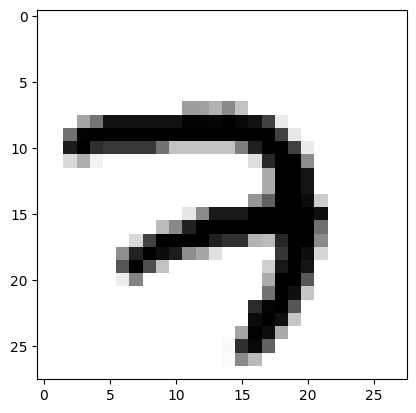

In [ ]:
# let view some data
plt.imshow(x_train[0],cmap="binary")
plt.show()

<Axes: >

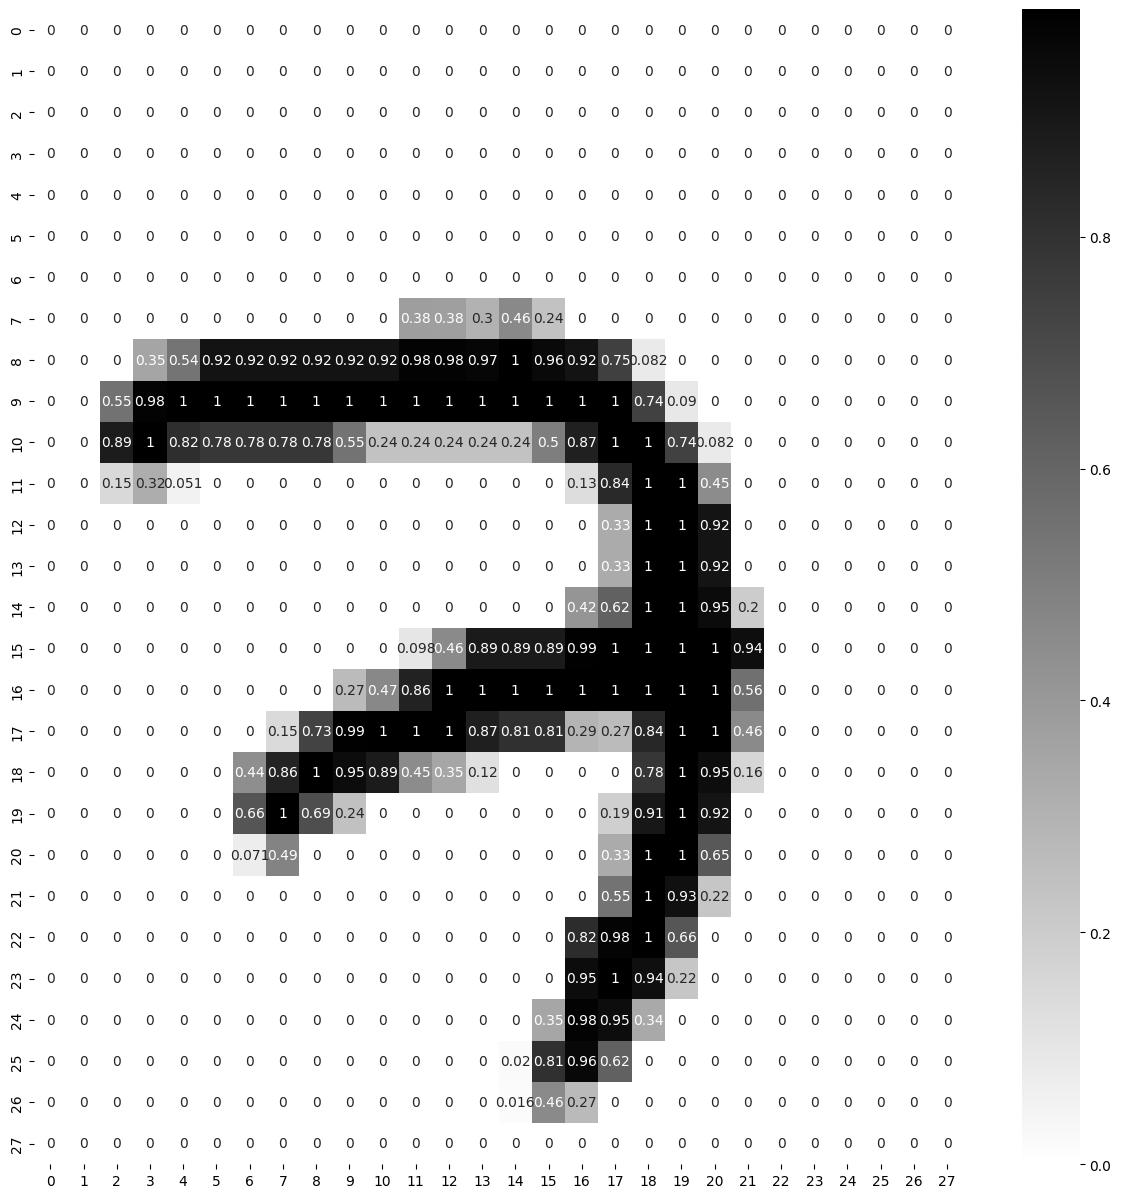

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=True,cmap="binary" )

In [ ]:
# create layers of ANN
layers= [tf.keras.layers.Flatten(input_shape =[28,28]),
         tf.keras.layers.Dense(300,activation="relu", name="hidden_layer_1"),
         tf.keras.layers.Dense(100,activation="relu",   name ="hidden_layer_2"),
         tf.keras.layers.Dense(10,activation="softmax" , name ="output")]
model_clf = tf.keras.models.Sequential(layers)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_clf.layers

[<Flatten name=flatten, built=True>,
 <Dense name=hidden_layer_1, built=True>,
 <Dense name=hidden_layer_2, built=True>,
 <Dense name=output, built=True>]

In [ ]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# first layer * second layer * bias
784*300+300,300*100+100,100*10+10

(235500, 30100, 1010)

In [ ]:
# total parameter to be trained
s = 235500 + 30100 + 1010
s

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hidden_layer_1'

In [ ]:
len(hidden1.get_weights()[1])

300

In [ ]:
hidden1.get_weights()

[array([[ 0.00966122, -0.02410239, -0.00846711, ...,  0.02033831,
          0.03600834,  0.00106846],
        [-0.05610737, -0.04156969,  0.02567019, ...,  0.04265677,
          0.06101575, -0.06426691],
        [ 0.00056022,  0.03068652,  0.00119085, ...,  0.00120506,
          0.06730171,  0.00990613],
        ...,
        [-0.05072043, -0.01877362,  0.0726296 , ..., -0.01752349,
          0.06446816,  0.00818192],
        [-0.00385449, -0.0286539 , -0.06351395, ...,  0.04935267,
         -0.0672925 , -0.07096069],
        [-0.02921797,  0.00568721,  0.04104151, ...,  0.00686975,
         -0.06428973,  0.05179338]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights,biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.00966122, -0.02410239, -0.00846711, ...,  0.02033831,
         0.03600834,  0.00106846],
       [-0.05610737, -0.04156969,  0.02567019, ...,  0.04265677,
         0.06101575, -0.06426691],
       [ 0.00056022,  0.03068652,  0.00119085, ...,  0.00120506,
         0.06730171,  0.00990613],
       ...,
       [-0.05072043, -0.01877362,  0.0726296 , ..., -0.01752349,
         0.06446816,  0.00818192],
       [-0.00385449, -0.0286539 , -0.06351395, ...,  0.04935267,
        -0.0672925 , -0.07096069],
       [-0.02921797,  0.00568721,  0.04104151, ...,  0.00686975,
        -0.06428973,  0.05179338]], dtype=float32)

In [ ]:
loss_function = "sparse_categorical_crossentropy"
optimizer = "sgd"
metrics = ["accuracy"]

model_clf.compile(loss=loss_function,
                 optimizer=optimizer,
                 metrics = metrics)

In [ ]:
# training
epoch = 30
validation_set = (x_valid,y_valid)

history = model_clf.fit(x_train,y_train,epochs=epoch,
                     validation_data=validation_set,batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7231 - loss: 1.0392 - val_accuracy: 0.9126 - val_loss: 0.3096
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9148 - loss: 0.3032 - val_accuracy: 0.9318 - val_loss: 0.2407
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9301 - loss: 0.2453 - val_accuracy: 0.9450 - val_loss: 0.2010
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9420 - loss: 0.2013 - val_accuracy: 0.9520 - val_loss: 0.1779
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9501 - loss: 0.1774 - val_accuracy: 0.9566 - val_loss: 0.1584
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9558 - loss: 0.1590 - val_accuracy: 0.9594 - val_loss: 0.1499
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9606 - loss: 0.1400 - val_accuracy: 0.9636 - val_loss: 0.1338
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9641 - loss: 0.1280 -

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)


,accuracy,loss,val_accuracy,val_loss
0,0.841455,0.612900,0.9126,0.309594
1,0.919673,0.283717,0.9318,0.240719
2,0.933036,0.233549,0.9450,0.200996
3,0.943291,0.199930,0.9520,0.177878
4,0.950455,0.175232,0.9566,0.158403
5,0.955782,0.155430,0.9594,0.149947
6,0.960727,0.139268,0.9636,0.133758
7,0.964891,0.125718,0.9656,0.127390
8,0.968036,0.114432,0.9680,0.119451
9,0.971000,0.104927,0.9708,0.109643


<Axes: >

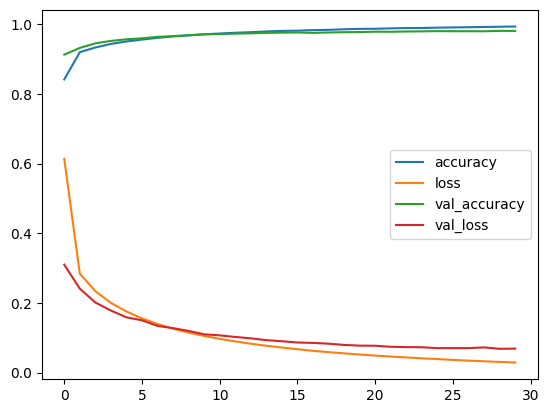

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0863


[0.07192309200763702, 0.9776999950408936]

In [ ]:
x_new = x_test[:3]


In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [ ]:
y_prob

array([[1.2731871e-05, 5.0800440e-07, 4.4860957e-05, 1.2217615e-03,
        5.0894098e-08, 2.9388102e-06, 2.2614052e-10, 9.9861729e-01,
        1.0046538e-05, 8.9847483e-05],
       [8.6838253e-07, 3.1820709e-05, 9.9994576e-01, 1.7254235e-05,
        7.1916979e-13, 1.3319493e-07, 3.8195444e-07, 2.9296060e-12,
        3.7662264e-06, 1.5801913e-14],
       [2.1533754e-06, 9.9812049e-01, 4.1638297e-04, 1.6115913e-05,
        1.9214097e-04, 6.5021777e-06, 3.3906425e-05, 6.5084040e-04,
        5.6022353e-04, 1.2427649e-06]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob,axis=-1)
y_pred


array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

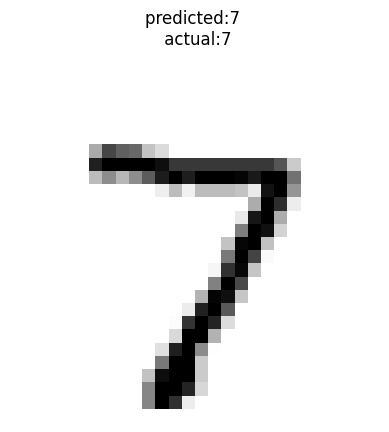

##############


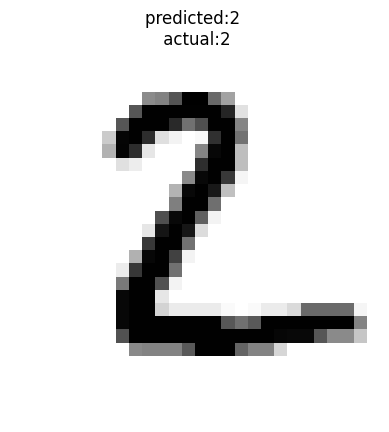

##############


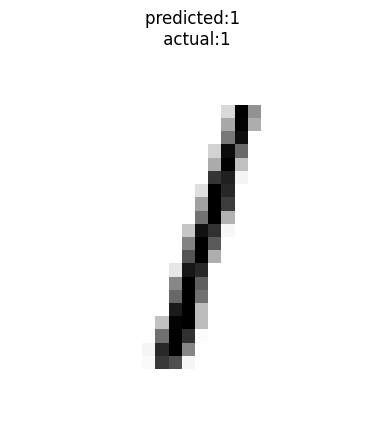

##############


In [ ]:
#plot
for data,pred,actual in zip(x_new,y_pred,actual):
    plt.imshow(data,cmap="binary")
    plt.title(f"predicted:{pred} \n actual:{actual}")
    plt.axis("off")
    plt.show()
    print("##############")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')